# Visualizing tweets and the Logistic Regression model

Objectives: Visualize and interpret the logistic regression model
Steps:
* Plot tweets in a scatter plot using their positive and negative sums
* Plot the output of the logistic regression model in the asme plot as a solid line

In [2]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

from utils import process_tweet, build_freqs

In [3]:
# Load NLTK sample dataset as before
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

In [4]:
# Get training subset of data
train_size = 4000
train_x = all_positive_tweets[:train_size] + all_negative_tweets[:train_size]
print('number of tweets in training set:', len(train_x))

number of tweets in training set: 8000


In [6]:
# Load features
data = pd.read_csv('logistic_features.csv')
data.head()

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [7]:
# Convert to numpy arrays
X = data[['bias', 'positive', 'negative']].values
Y = data['sentiment'].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [8]:
# Load a pretrained Logistic Regression model
theta = [7e-08, 0.0005239, -0.00055517]

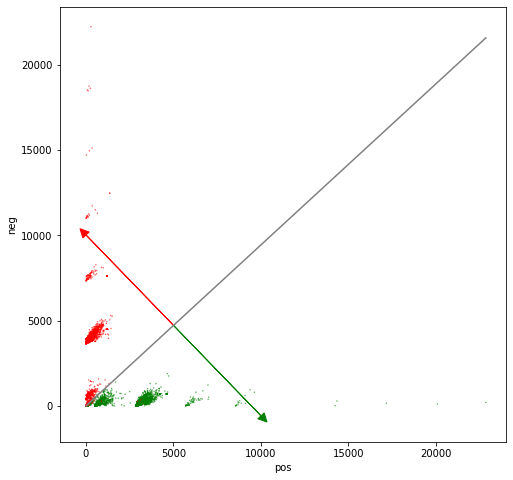

In [13]:
# Plot samples in a scatter plot. Theta represents a plane that splits our feature space into two parts. Samples located over that plane are considered positive, and samples under the plane negative. We'rd in 3-space, with dimensions [bias, positive_sum, negative_sum], where bias=1. Can remove bias and have 2D

fig, ax = plt.subplots(figsize=(8,8))
colors=['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s=0.1)
plt.xlabel('pos');
plt.ylabel('neg');

# Now draw a gray line to show the cutoff of the classifier.

# Equation for the separation plane
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction fo the sentiments change
def direction(theta, pos):
    return pos * theta[2] / theta[1]

maxpos = np.max(X[:,1])
offset = 5000

ax.plot([0, maxpos], [neg(theta, 0), neg(theta, maxpos)], color='gray')

ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')

ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()
